#  SNLS Magnitudes and Colors from its catalog
======================================================================

- author : Sylvie Dagoret-Campagne
- date : March 22th 2018
- update : May 3rd 2018

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [102]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [103]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
#from regions import PixCoord, CircleSkyRegion, CirclePixelRegion, RectangleSkyRegion, RectanglePixelRegion

In [104]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Read file

In [105]:
df=pd.read_csv('SNLS_catD1D2D4.csv',index_col=0)

In [106]:
df.head()

,rag,decg,mxu,mxg,mxr,mxi,mxi2,mxz,data
0,36.385099,-4.996876,21.262462,19.131542,17.885551,16.976569,17.049769,16.583786,D1
1,36.532753,-4.996622,19.296211,18.510545,18.141572,17.993850,18.003495,17.936816,D1
2,36.093245,-4.992603,19.695154,17.795234,16.833046,16.417383,16.442505,16.220391,D1
3,36.473862,-4.992807,18.418090,17.413157,16.939017,16.754636,16.769276,16.675400,D1
4,36.546502,-4.994603,22.990037,20.823232,19.558416,18.027183,18.136777,17.385769,D1


In [107]:
df1=df[df.data=='D1']
df2=df[df.data=='D2']
df3=df[df.data=='D4']

# Magnitude distributions

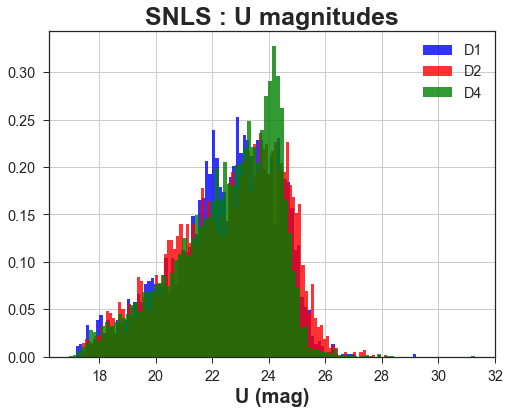

In [108]:
df1["mxu"].hist(bins=100,color='blue',alpha=0.8,normed=1,label="D1")
df2["mxu"].hist(bins=100,color='red',alpha=0.8,normed=1,label="D2")
df3["mxu"].hist(bins=100,color='green',alpha=0.8,normed=1,label="D4")
plt.xlabel("U (mag)",fontsize=20,fontweight='bold')
plt.title("SNLS : U magnitudes",fontsize=25,fontweight='bold')
plt.legend()

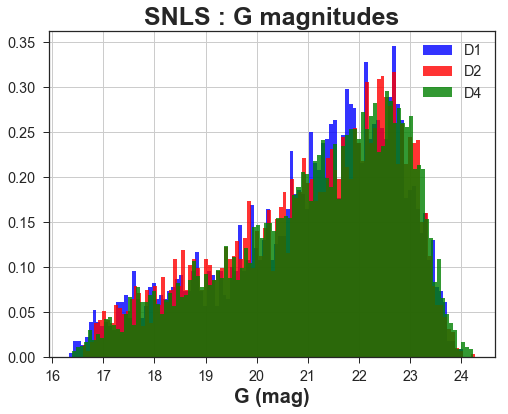

In [109]:
df1["mxg"].hist(bins=100,color='blue',alpha=0.8,normed=1,label="D1")
df2["mxg"].hist(bins=100,color='red',alpha=0.8,normed=1,label="D2")
df3["mxg"].hist(bins=100,color='green',alpha=0.8,normed=1,label="D4")
plt.xlabel("G (mag)",fontsize=20,fontweight='bold')
plt.title("SNLS : G magnitudes",fontsize=25,fontweight='bold')
plt.legend()

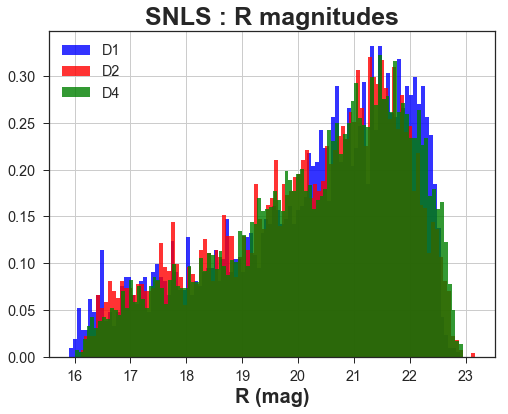

In [110]:
df1["mxr"].hist(bins=100,color='blue',alpha=0.8,normed=1,label="D1")
df2["mxr"].hist(bins=100,color='red',alpha=0.8,normed=1,label="D2")
df3["mxr"].hist(bins=100,color='green',alpha=0.8,normed=1,label="D4")
plt.xlabel("R (mag)",fontsize=20,fontweight='bold')
plt.title("SNLS : R magnitudes",fontsize=25,fontweight='bold')
plt.legend()

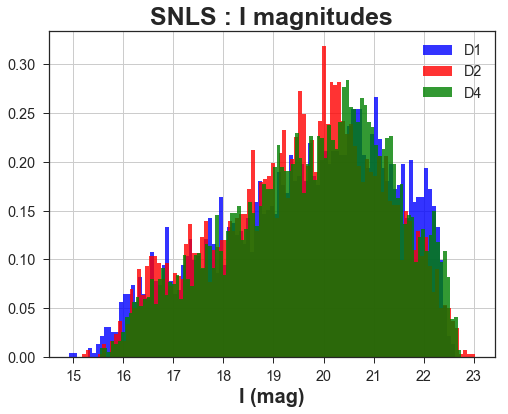

In [111]:
df1["mxi"].hist(bins=100,color='blue',alpha=0.8,normed=1,label="D1")
df2["mxi"].hist(bins=100,color='red',alpha=0.8,normed=1,label="D2")
df3["mxi"].hist(bins=100,color='green',alpha=0.8,normed=1,label="D4")
plt.xlabel("I (mag)",fontsize=20,fontweight='bold')
plt.title("SNLS : I magnitudes",fontsize=25,fontweight='bold')
plt.legend()

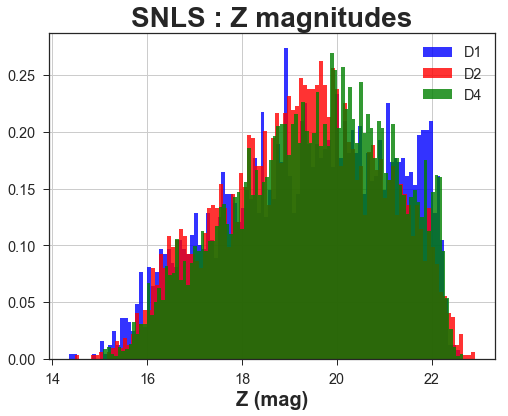

In [112]:
df1["mxz"].hist(bins=100,color='blue',alpha=0.8,normed=1,label="D1")
df2["mxz"].hist(bins=100,color='red',alpha=0.8,normed=1,label="D2")
df3["mxz"].hist(bins=100,color='green',alpha=0.8,normed=1,label="D4")
plt.xlabel("Z (mag)",fontsize=20,fontweight='bold')
plt.title("SNLS : Z magnitudes",fontsize=28,fontweight='bold')
plt.legend()

# Add colors

In [113]:
df["u-g"]=df["mxu"]-df["mxg"]
df["g-r"]=df["mxg"]-df["mxr"]
df["r-i"]=df["mxr"]-df["mxi"]
df["i-z"]=df["mxi"]-df["mxz"]

In [114]:
df.head()

,rag,decg,mxu,mxg,mxr,mxi,mxi2,mxz,data,u-g,g-r,r-i,i-z
0,36.385099,-4.996876,21.262462,19.131542,17.885551,16.976569,17.049769,16.583786,D1,2.130920,1.245991,0.908982,0.392783
1,36.532753,-4.996622,19.296211,18.510545,18.141572,17.993850,18.003495,17.936816,D1,0.785666,0.368973,0.147722,0.057034
2,36.093245,-4.992603,19.695154,17.795234,16.833046,16.417383,16.442505,16.220391,D1,1.899920,0.962188,0.415663,0.196992
3,36.473862,-4.992807,18.418090,17.413157,16.939017,16.754636,16.769276,16.675400,D1,1.004933,0.474140,0.184380,0.079237
4,36.546502,-4.994603,22.990037,20.823232,19.558416,18.027183,18.136777,17.385769,D1,2.166805,1.264816,1.531233,0.641415


In [115]:
df.tail()

,rag,decg,mxu,mxg,mxr,mxi,mxi2,mxz,data,u-g,g-r,r-i,i-z
6365,333.436278,-17.416459,23.364386,23.567707,22.484696,21.183721,21.268830,20.708533,D4,-0.203321,1.083011,1.300976,0.475187
6366,333.650622,-18.255006,26.878304,22.638379,21.287413,20.194476,20.288605,19.742495,D4,4.239925,1.350966,1.092936,0.451981
6368,333.743288,-18.128459,20.729655,20.393499,20.514537,20.691476,20.681226,20.799160,D4,0.336156,-0.121038,-0.176939,-0.107684
6369,334.091379,-17.735521,20.367890,20.316066,20.623266,20.956724,20.913936,21.204944,D4,0.051824,-0.307200,-0.333459,-0.248220
6371,333.359984,-17.388596,20.710499,20.384350,20.605601,20.812016,20.766624,21.008055,D4,0.326149,-0.221251,-0.206415,-0.196039


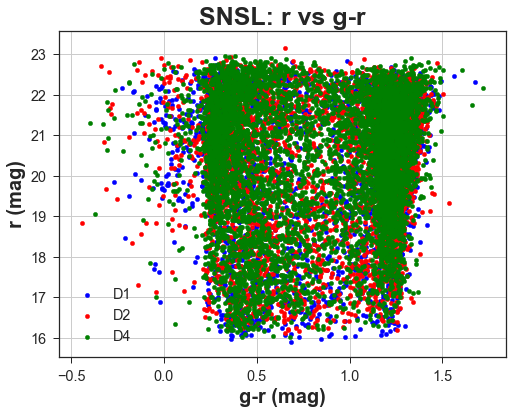

In [116]:
colorset = zip( ["blue","red","green"], ["D1","D2","D4"]) 

for color, label in colorset :
    subset = df[df.data == label]
    plt.scatter(subset["g-r"], subset["mxr"], s=20, c=color, label=label)
plt.xlabel("g-r (mag)",fontsize=20,fontweight='bold')
plt.ylabel("r (mag)",fontsize=20,fontweight='bold')
plt.legend()
plt.title("SNSL: r vs g-r",fontsize=25,fontweight='bold')
plt.grid(True)

# Study colors

In [117]:
dfcoll=df.loc[:,["data","u-g","g-r","r-i","i-z"]]

In [118]:
dfcoll.head()

,data,u-g,g-r,r-i,i-z
0,D1,2.130920,1.245991,0.908982,0.392783
1,D1,0.785666,0.368973,0.147722,0.057034
2,D1,1.899920,0.962188,0.415663,0.196992
3,D1,1.004933,0.474140,0.184380,0.079237
4,D1,2.166805,1.264816,1.531233,0.641415


In [119]:
dfcoll1=dfcoll[dfcoll.data=='D1']
dfcoll2=dfcoll[dfcoll.data=='D2']
dfcoll3=dfcoll[dfcoll.data=='D4']

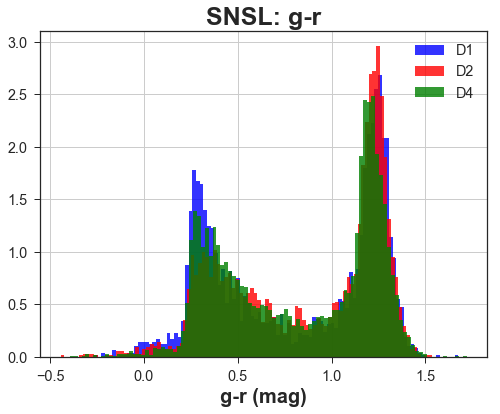

In [120]:
colorset = zip( ["blue","red","green"], ["D1","D2","D4"]) 

for color, label in colorset :
    subset = df[df.data == label]
    subset["g-r"].hist(bins=100,color=color,alpha=0.8,normed=1,label=label)
plt.xlabel("g-r (mag)",fontsize=20,fontweight='bold')
plt.title("SNSL: g-r",fontsize=25,fontweight='bold')
plt.legend()

## Covariance matrix

In [121]:
dfcoll.cov()

,u-g,g-r,r-i,i-z
u-g,0.447037,0.234441,0.225961,0.092269
g-r,0.234441,0.169363,0.178378,0.073348
r-i,0.225961,0.178378,0.254053,0.102363
i-z,0.092269,0.073348,0.102363,0.044114


In [122]:
dfcoll1.cov()

,u-g,g-r,r-i,i-z
u-g,0.474669,0.266828,0.258377,0.107160
g-r,0.266828,0.189722,0.199040,0.083051
r-i,0.258377,0.199040,0.276818,0.112991
i-z,0.107160,0.083051,0.112991,0.048890


In [123]:
dfcoll2.cov()

,u-g,g-r,r-i,i-z
u-g,0.461726,0.246263,0.243370,0.100585
g-r,0.246263,0.162573,0.170871,0.070992
r-i,0.243370,0.170871,0.248524,0.101225
i-z,0.100585,0.070992,0.101225,0.043532


In [124]:
dfcoll3.cov()

,u-g,g-r,r-i,i-z
u-g,0.409515,0.207315,0.195599,0.078903
g-r,0.207315,0.162343,0.172088,0.069858
r-i,0.195599,0.172088,0.245568,0.097678
i-z,0.078903,0.069858,0.097678,0.042094


## Correlation matrix

In [125]:
dfcoll.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.852024,0.670502,0.657047
g-r,0.852024,1.000000,0.859940,0.848575
r-i,0.670502,0.859940,1.000000,0.966922
i-z,0.657047,0.848575,0.966922,1.000000


In [126]:
dfcoll1.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.889153,0.712789,0.703437
g-r,0.889153,1.000000,0.868532,0.862335
r-i,0.712789,0.868532,1.000000,0.971257
i-z,0.703437,0.862335,0.971257,1.000000


In [127]:
dfcoll2.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.898839,0.718442,0.709477
g-r,0.898839,1.000000,0.850079,0.843879
r-i,0.718442,0.850079,1.000000,0.973198
i-z,0.709477,0.843879,0.973198,1.000000


In [128]:
dfcoll3.corr()

,u-g,g-r,r-i,i-z
u-g,1.000000,0.804042,0.616803,0.600967
g-r,0.804042,1.000000,0.861883,0.845067
r-i,0.616803,0.861883,1.000000,0.960730
i-z,0.600967,0.845067,0.960730,1.000000


## Plots

/Users/dagoret/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


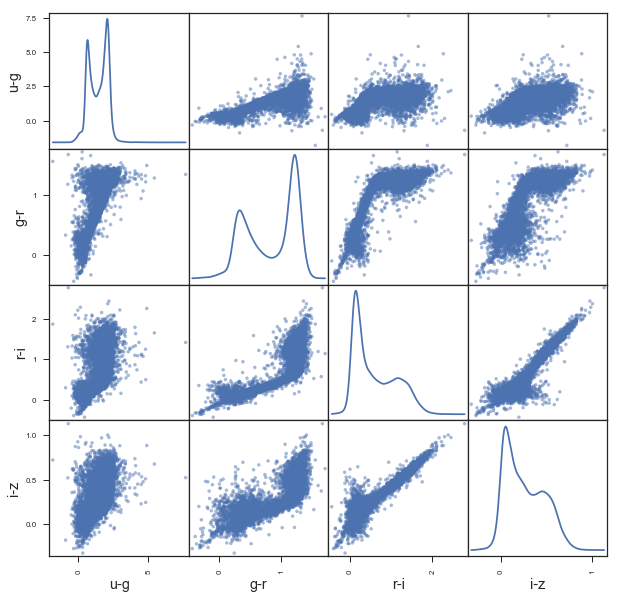

In [129]:
#g=pd.scatter_matrix(dfcoll,diagonal="kde",grid=True,alpha=0.3,color='red',figsize=(8,8))
g=pd.scatter_matrix(dfcoll,diagonal="kde",figsize=(10,10))

In [130]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

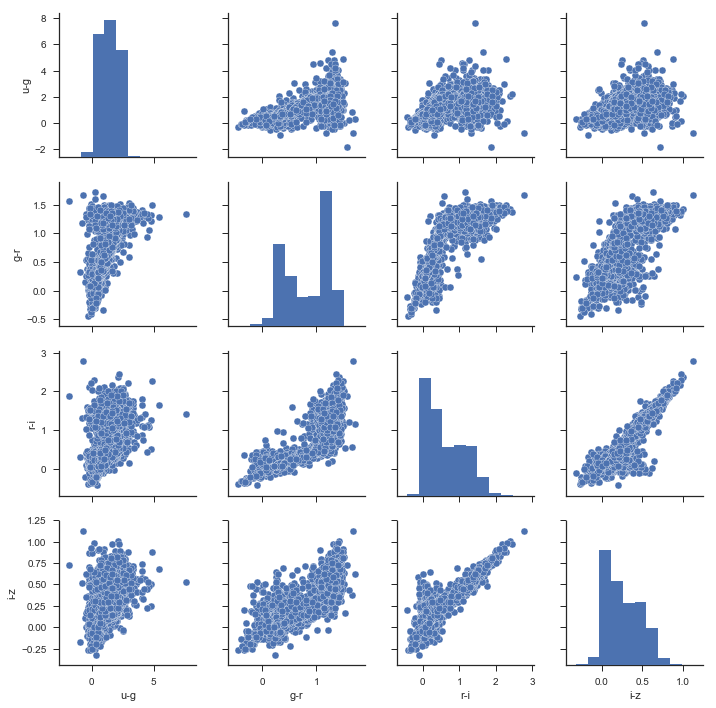

In [131]:
g = sns.pairplot(dfcoll)

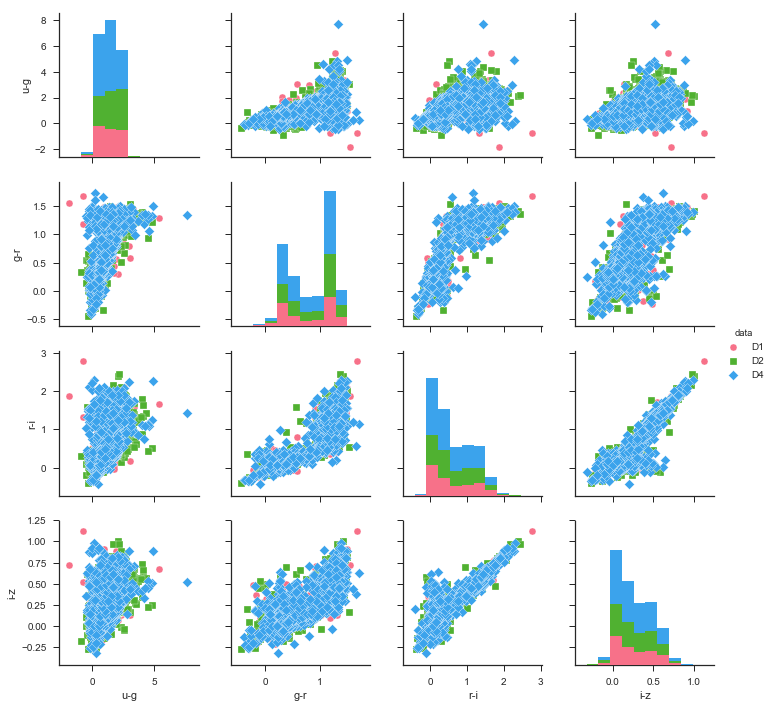

In [132]:
g = sns.pairplot(dfcoll, hue="data",palette="husl",markers=["o", "s", "D"])

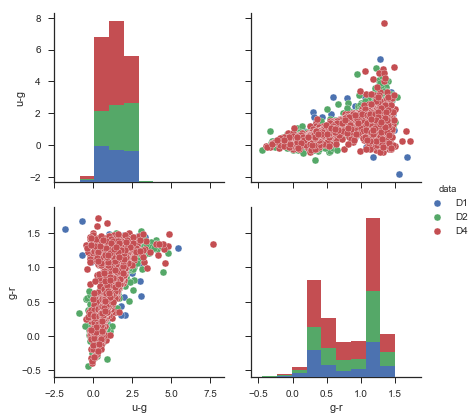

In [133]:
g = sns.pairplot(dfcoll, size=3, hue="data",
...                  vars=["u-g", "g-r"])

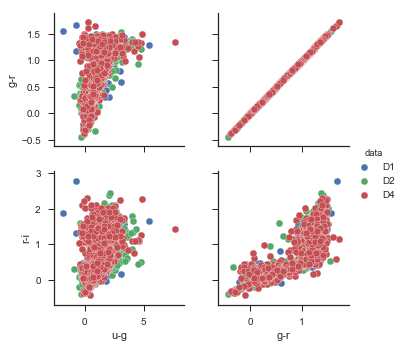

In [134]:
g = sns.pairplot(dfcoll,hue="data",
...                  x_vars=["u-g", "g-r"],
...                  y_vars=["g-r", "r-i"])

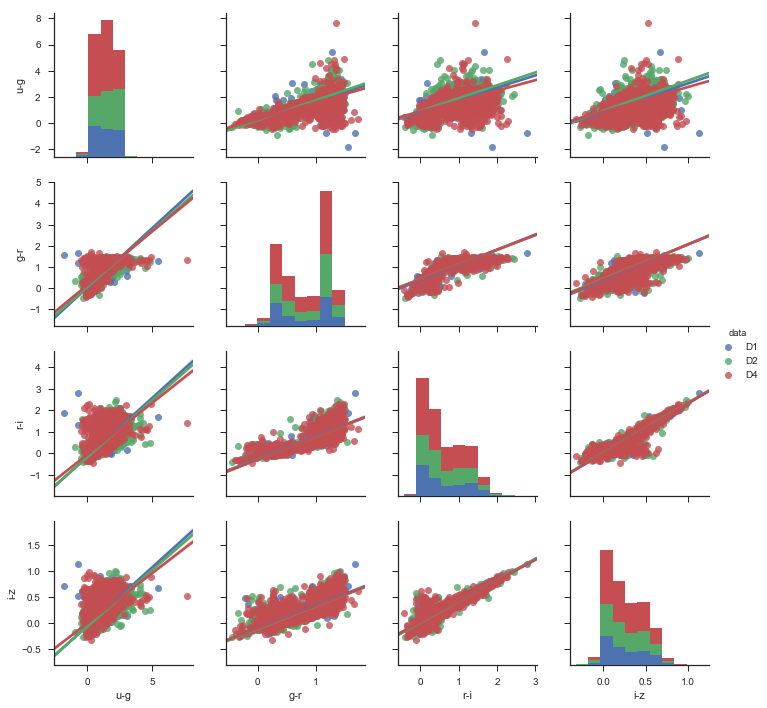

In [135]:
g = sns.pairplot(dfcoll, hue="data",kind="reg")

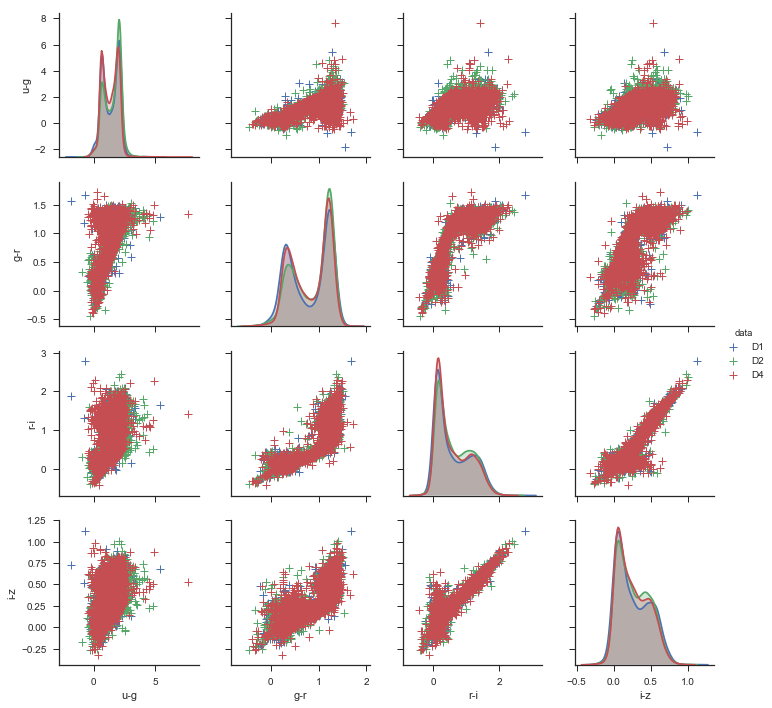

In [136]:
g = sns.pairplot(dfcoll, diag_kind="kde",markers="+",hue="data",
...                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
...                  diag_kws=dict(shade=True))

# Save in a file

In [137]:
dfcoll.to_csv('SNLS_col_D1D2D4.csv')